# Change runtime to GPU

## Basic Python (5-10 mins)


In [28]:
print("Hello World")

Hello World


In [29]:
x = 3 * 4 + 9 ** 2 # order of operations still matter
print(x)

93


In [30]:
# syntax for functions
# def FUNC_NAME (PARAMS):
#   body
def hello(title, name): 
  return "Hello, " + title + ". " + name + ", " + "it is very nice to meet you."

hello("Mr", "Gotwals") # function call

'Hello, Mr. Gotwals, it is very nice to meet you.'

In [31]:
for i in range(2000):
  hello("Mr", "Gotwals") # this will NOT work. the function doesn't print anything. you're going to need to 

for i in range(50):
  print(hello("Mr", "Gotwals")) # you need to print the output that is returned

Hello, Mr. Gotwals, it is very nice to meet you.
Hello, Mr. Gotwals, it is very nice to meet you.
Hello, Mr. Gotwals, it is very nice to meet you.
Hello, Mr. Gotwals, it is very nice to meet you.
Hello, Mr. Gotwals, it is very nice to meet you.
Hello, Mr. Gotwals, it is very nice to meet you.
Hello, Mr. Gotwals, it is very nice to meet you.
Hello, Mr. Gotwals, it is very nice to meet you.
Hello, Mr. Gotwals, it is very nice to meet you.
Hello, Mr. Gotwals, it is very nice to meet you.
Hello, Mr. Gotwals, it is very nice to meet you.
Hello, Mr. Gotwals, it is very nice to meet you.
Hello, Mr. Gotwals, it is very nice to meet you.
Hello, Mr. Gotwals, it is very nice to meet you.
Hello, Mr. Gotwals, it is very nice to meet you.
Hello, Mr. Gotwals, it is very nice to meet you.
Hello, Mr. Gotwals, it is very nice to meet you.
Hello, Mr. Gotwals, it is very nice to meet you.
Hello, Mr. Gotwals, it is very nice to meet you.
Hello, Mr. Gotwals, it is very nice to meet you.
Hello, Mr. Gotwals, 

In [32]:
lst = ["hello", 1, 2, "bobby", "okay"]
lst

['hello', 1, 2, 'bobby', 'okay']

In [33]:
lst[1]

1

In [40]:
# FLIP A COIN 500 TIMES

import random
tracker = [] # holds all of our results
for i in range(1000):
  tracker.append(random.randint(0, 1)) # add the result of the tracker list

print(sum(tracker))

521


## Data Science Methods (10 mins)

In [41]:
# imports!

from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

**Upload the `nba_salaries.csv` data here**

In [42]:
%ls

nba_salaries.csv  sample_data/


In [44]:
# load in the data 
nba_salaries = Table.read_table('nba_salaries.csv')

# rename a column
nba_salaries.relabel("'15-'16 SALARY", "SALARY")

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


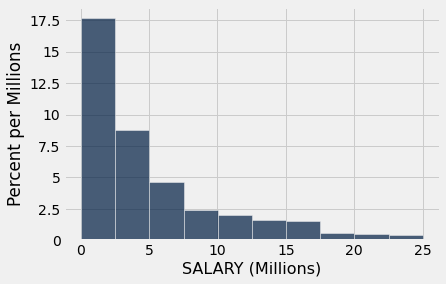

In [45]:
# create a histogram of the salary column
nba_salaries.hist("SALARY", unit="Millions")

In [46]:
# see how many players are on each team
nba_salaries.group("TEAM")

TEAM,count
Atlanta Hawks,14
Boston Celtics,15
Brooklyn Nets,13
Charlotte Hornets,18
Chicago Bulls,12
Cleveland Cavaliers,10
Dallas Mavericks,11
Denver Nuggets,14
Detroit Pistons,10
Golden State Warriors,14


In [47]:
# find out who makes the most money
nba_salaries.sort("SALARY", descending=True)

PLAYER,POSITION,TEAM,SALARY
Kobe Bryant,SF,Los Angeles Lakers,25
Joe Johnson,SF,Brooklyn Nets,24.8949
LeBron James,SF,Cleveland Cavaliers,22.9705
Carmelo Anthony,SF,New York Knicks,22.875
Dwight Howard,C,Houston Rockets,22.3594
Chris Bosh,PF,Miami Heat,22.1927
Chris Paul,PG,Los Angeles Clippers,21.4687
Kevin Durant,SF,Oklahoma City Thunder,20.1586
Derrick Rose,PG,Chicago Bulls,20.0931
Dwyane Wade,SG,Miami Heat,20


In [48]:
# see which team has players that make the most money

nba_salaries.group("TEAM", np.average).sort('SALARY average', descending=True) # can try sum as well, min, etc

TEAM,PLAYER average,POSITION average,SALARY average
Cleveland Cavaliers,,,10.2312
Houston Rockets,,,7.10715
Miami Heat,,,6.79406
Golden State Warriors,,,6.72037
Chicago Bulls,,,6.56841
San Antonio Spurs,,,6.5117
Los Angeles Lakers,,,6.23709
Sacramento Kings,,,6.21681
Oklahoma City Thunder,,,6.05201
Dallas Mavericks,,,5.97841


In [49]:
# original table is not modified
nba_salaries

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [13]:
avg_sal = np.average(nba_salaries.column("SALARY")) # average salary of all the players
avg_sal

5.074814482014388

In [50]:
above_avg = nba_salaries.where("SALARY", are.above(avg_sal))
above_avg

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Avery Bradley,PG,Boston Celtics,7.73034
Isaiah Thomas,PG,Boston Celtics,6.91287
Jae Crowder,SF,Boston Celtics,6.79612
Joe Johnson,SF,Brooklyn Nets,24.8949
Thaddeus Young,PF,Brooklyn Nets,11.236


In [27]:
# rename columns

def get_full_name(abbr):
  mapper = {
    "PF": "Power Forward",
    "C": "Center",
    "PG": "Point Gaurd",
    "SF": "Small Forward",
    "SG": "Shooting Guard"
  }
  try:
    return mapper[abbr]
  except Exception as e:
    print(abbr, "threw an error:", e)
    return "Unknown"

# take everything in the position column and apply the get_full_name function
long_names = nba_salaries.apply(get_full_name, "POSITION") # returns a nunpy array

# add the full name numpy array to the table
full_name_data = nba_salaries.with_column("POSITION FULL", long_names)

# drop the position column
full_name_data.select("PLAYER", "TEAM", "SALARY", "POSITION FULL")

PLAYER,TEAM,SALARY,POSITION FULL
Paul Millsap,Atlanta Hawks,18.6717,Power Forward
Al Horford,Atlanta Hawks,12,Center
Tiago Splitter,Atlanta Hawks,9.75625,Center
Jeff Teague,Atlanta Hawks,8,Point Gaurd
Kyle Korver,Atlanta Hawks,5.74648,Shooting Guard
Thabo Sefolosha,Atlanta Hawks,4,Small Forward
Mike Scott,Atlanta Hawks,3.33333,Power Forward
Kent Bazemore,Atlanta Hawks,2,Small Forward
Dennis Schroder,Atlanta Hawks,1.7634,Point Gaurd
Tim Hardaway Jr.,Atlanta Hawks,1.30452,Shooting Guard


## Sentiment Analysis (20 mins)

In [54]:
# sentiment analysis imports (explain what it is)

import nltk
nltk.download([
     "names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",
 ])

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [55]:
# grab tweets from nltk and replace URLS
tweets = [t.replace("://", "//") for t in nltk.corpus.twitter_samples.strings()]
tweets

['hopeless for tmr :(',
 "Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(",
 '@Hegelbon That heart sliding into the waste basket. :(',
 '“@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too',
 'Dang starting next week I have "work" :(',
 "oh god, my babies' faces :( https//t.co/9fcwGvaki0",
 '@RileyMcDonough make me smile :((',
 '@f0ggstar @stuartthull work neighbour on motors. Asked why and he said hates the updates on search :( http//t.co/XvmTUikWln',
 'why?:("@tahuodyy: sialan:( https//t.co/Hv1i0xcrL2"',
 'Athabasca glacier was there in #1948 :-( #athabasca #glacier #jasper #jaspernationalpark #alberta #explorealberta #… http//t.co/dZZdqmf7Cz',
 "I have a really good m&amp;g idea but I'm never going to meet them :(((",
 '@Rampageinthebox mare ivan :(',
 '@SophiaMascardo happy trip, keep safe. see you soon :* :(',
 "I'm so tired hahahah :(",
 '@GrumpyCockney With knee replacements they get you up &amp; about the same day. :-(   Ouch.'

In [56]:
# more imports for sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# SentimentIntensityAnalyzer is something that is pretrained and we can use
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


{'compound': 0.8012, 'neg': 0.0, 'neu': 0.295, 'pos': 0.705}

In [73]:
def clean_tweet(tweet):
  # remove stopwords and maker lowercase
  clean = tweet.lower().split() # create list
  stop_words = nltk.corpus.stopwords.words('english')
  filtered_sentence = [w for w in clean if w not in stop_words] # add word to lst only if it is useful word
  return " ".join(filtered_sentence)


# clean_tweet(tweets[0])

def getSentiment(tweet):
    cleaned = clean_tweet(tweet)
    return sia.polarity_scores(cleaned)["compound"]

data = {'Tweet': tweets, # this will still be the old weet
        'Sentiment': [getSentiment(tweet) for tweet in tweets]}

df = pd.DataFrame(data) # create table
df.head(5) # show table



,Tweet,Sentiment
0,hopeless for tmr :(,-0.7096
1,Everything in the kids section of IKEA is so c...,-0.4588
2,@Hegelbon That heart sliding into the waste ba...,-0.6908
3,"“@ketchBurning: I hate Japanese call him ""bani...",-0.7650
4,"Dang starting next week I have ""work"" :(",-0.4404


In [74]:
df["Sentiment Text"] = ["Positive" if score > 0 else "Negative" for score in df["Sentiment"]]
df

,Tweet,Sentiment,Sentiment Text
0,hopeless for tmr :(,-0.7096,Negative
1,Everything in the kids section of IKEA is so c...,-0.4588,Negative
2,@Hegelbon That heart sliding into the waste ba...,-0.6908,Negative
3,"“@ketchBurning: I hate Japanese call him ""bani...",-0.7650,Negative
4,"Dang starting next week I have ""work"" :(",-0.4404,Negative
...,...,...,...
29995,RT @UKLabour: .@Ed_Miliband: we're not going t...,0.0000,Negative
29996,RT @DisabledScot: @blairmcdougall @ScotlandTon...,0.0000,Negative
29997,RT @Staircase2: @VividRicky exactly but that a...,0.0000,Negative
29998,Actually agreed with %95 of what farage was sa...,0.2732,Positive


## Classifying movie reviews (20 min)

### Loading and looking at data

In [75]:
# tensorflow imports
import tensorflow as tf
import tensorflow_datasets as tfds

from IPython.display import display
import pandas as pd
import numpy as np
import tensorflow_hub as hub

In [76]:
ds = tfds.load('imdb_reviews', split='train', shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete8YGXK2/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete8YGXK2/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete8YGXK2/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [77]:
df = tfds.as_dataframe(ds) # conver the dataset object into a pandas dataframe

In [78]:
print("there are", len(df), "rows of data") 
df.head(5) # take a look at the data

there are 25000 rows of data


,label,text
0,0,"b""This was an absolutely terrible movie. Don't..."
1,0,b'I have been known to fall asleep during film...
2,0,b'Mann photographs the Alberta Rocky Mountains...
3,1,b'This is the kind of film for a snowy Sunday ...
4,1,"b'As others have mentioned, all the women that..."


In [79]:
df.isna().sum() # look at how many missing values are in the dataset

label    0
text     0
dtype: int64

In [80]:
# TAKE A LOOK AT HOW MANY POSITIVE AND HOW MANY NEGATIVE REVIEWS THERE ARE
labels = df["label"] # grab the label column
is_positive = labels == 1 # 1 represents positive reviews 
num_positive = np.count_nonzero(is_positive)
num_negative = len(labels) - num_positive

print("There are", num_positive, "positive reviews.") # perfectly uniform
print("There are", num_negative, "negative reviews.") # perfectly uniform

There are 12500 positive reviews.
There are 12500 negative reviews.


### Training the model

In [82]:
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'), # 60% training, 40% validation, 25,000 examples testing
    as_supervised=True)

# Training data - used by the model to adjust weights
# Vaidation data - estimates how well the model was trained (shows metics such as accuracy)
# Test data - predictions the model will make on data its never seen before

In [84]:
# take a look at the first 10 movie reviews

train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch
# tensors are  Tensors are multi-dimensional arrays with a uniform type 

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [85]:
train_labels_batch # look at the labels of each (1 is positive)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

In [87]:
# we're going to use a pre-trained text embedding system for each sentence (means that we don't need to preprocess the data)
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2" 
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True) # returns a function

hub_layer(train_examples_batch) # take a look at some embeddings

<tf.Tensor: shape=(10, 50), dtype=float32, numpy=
array([[ 5.42319417e-01, -1.19017111e-02,  6.33753687e-02,
         6.86296970e-02, -1.67768389e-01, -1.05811775e-01,
         1.68652996e-01, -4.99882288e-02, -3.11480522e-01,
         7.91034400e-02,  1.54422581e-01,  1.48866102e-02,
         3.93015482e-02,  1.97727159e-01, -1.22154772e-01,
        -4.12098169e-02, -2.70410866e-01, -2.19221473e-01,
         2.65176564e-01, -8.07390749e-01,  2.58335263e-01,
        -3.10042024e-01,  2.86832094e-01,  1.94338664e-01,
        -2.90364981e-01,  3.86285000e-02, -7.84441233e-01,
        -4.79323789e-02,  4.11029875e-01, -3.63888860e-01,
        -5.80347061e-01,  3.02694529e-01,  3.63089621e-01,
        -1.52271628e-01, -4.43915099e-01,  1.94629967e-01,
         1.95284054e-01,  5.66623323e-02,  2.89070398e-01,
        -2.84683228e-01, -5.31206280e-03,  5.71938045e-02,
        -3.20131898e-01, -4.41866480e-02, -8.55078101e-02,
        -5.58474362e-01, -2.33363897e-01, -2.07829565e-01,
      

In [88]:
# create the model
model = tf.keras.Sequential([
  hub_layer, # to turn each sentence into embeddings (numbers)
  tf.keras.layers.Dense(16, activation='relu'), # take the embeddings and add thme to a fully connected (Dense) layer with 16 neurons
  # relu is an activation function that is applied to the output of the Dense layer
  tf.keras.layers.Dense(1) # only one neuron because we want one value (either a 1 or 0)
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(optimizer='adam', # optimizer that uses a combo of two gradient descent methods
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), # binary classification. measures the distance between the true label and the prediction
              metrics=['accuracy']) # show how accurate we are

# gradient descent minimizes loss function (measures how far a predicted value is from its true value)

In [91]:
# train the model
history = model.fit(train_data.batch(512),
                    epochs=10, # 10 iterations over all samples in the training dataset
                    validation_data=validation_data.batch(512), # batches of 512 rows at a time
                    verbose=True) # show the output as training goes

Epoch 1/10
30/30 [==============================] - 8s 139ms/step - loss: 0.6474 - accuracy: 0.5431 - val_loss: 0.5955 - val_accuracy: 0.5925
Epoch 2/10
30/30 [==============================] - 4s 132ms/step - loss: 0.5256 - accuracy: 0.6947 - val_loss: 0.4916 - val_accuracy: 0.7444
Epoch 3/10
30/30 [==============================] - 4s 131ms/step - loss: 0.4028 - accuracy: 0.8234 - val_loss: 0.4065 - val_accuracy: 0.8131
Epoch 4/10
30/30 [==============================] - 4s 132ms/step - loss: 0.3008 - accuracy: 0.8841 - val_loss: 0.3521 - val_accuracy: 0.8403
Epoch 5/10
30/30 [==============================] - 4s 131ms/step - loss: 0.2209 - accuracy: 0.9211 - val_loss: 0.3236 - val_accuracy: 0.8527
Epoch 6/10
30/30 [==============================] - 4s 131ms/step - loss: 0.1623 - accuracy: 0.9482 - val_loss: 0.3114 - val_accuracy: 0.8609
Epoch 7/10
30/30 [==============================] - 4s 130ms/step - loss: 0.1187 - accuracy: 0.9671 - val_loss: 0.3114 - val_accuracy: 0.8651
Epoch 

In [93]:
# evaluate on test data
results = model.evaluate(test_data.batch(512), verbose=2) # grab 512 testing examples and feed them through model

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

49/49 - 4s - loss: 0.3665 - accuracy: 0.8556 - 4s/epoch - 81ms/step
loss: 0.366
accuracy: 0.856


In [94]:
# make predictions!
preds = np.array(["This movie was great", "i fell asleep during the movie"])
res = model.predict(preds)
res

array([[ 2.3456793],
       [-3.666404 ]], dtype=float32)

### Our in class Python workshop left off here...
The rest of this code will:
1. Read movie reviews from a Google Spreadsheet named "[Movie Reviews](https://docs.google.com/spreadsheets/d/1n3xiK_qQ584wFVmT1-Q1P18uzuLO4sFub0acOWlG8mA/edit#gid=216850569)". 
2. Make predictions on those reviews
3. Add predictions of those reviews to the Google Sheet
4. Add human readable movie reviews to the Google Sheet (Positive / Negative)

In [95]:
# add stuff to google sheets based on a dataset
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [96]:
# open the sheet
worksheet = gc.open('Movie Reviews').sheet1

cell_list = worksheet.col_values(1)[1:] # index 1 and on removes the header row

In [98]:
# predict!
predictions = model.predict(np.array(cell_list))
predictions

array([[-1.4936435],
       [ 5.376069 ],
       [ 3.9126987],
       ...,
       [-1.5976812],
       [-2.7687664],
       [-5.4489937]], dtype=float32)

In [99]:
# add the raw predictions 
worksheet.update_cell(1, 2, "raw prediction")
worksheet.update("B2", predictions.tolist())

{'spreadsheetId': '1IpPVysO24dexXFm23rhkRogRzX3fj-uXHPEowhtXDHA',
 'updatedCells': 50000,
 'updatedColumns': 1,
 'updatedRange': "'IMDB Dataset'!B2:B50001",
 'updatedRows': 50000}

In [ ]:
readable_preds = []

for pred in predictions:
  if pred > 0:
    readable_preds.append(["Positive"])
  else:
    readable_preds.append(["Negative"])
readable_preds

In [101]:
worksheet.update_cell(1, 3, "Prediction")
worksheet.update("C2", readable_preds)

{'spreadsheetId': '1IpPVysO24dexXFm23rhkRogRzX3fj-uXHPEowhtXDHA',
 'updatedCells': 50000,
 'updatedColumns': 1,
 'updatedRange': "'IMDB Dataset'!C2:C50001",
 'updatedRows': 50000}